In [1]:
from scipy.stats import bootstrap
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/bootstrap_data.csv')

In [3]:
df.head()

,value,group
0,100.719713,experimental
1,106.771525,experimental
2,106.974612,experimental
3,109.249662,experimental
4,116.230142,experimental


In [6]:
df.groupby('group').agg({'value':'count'})

,value
group,
control,760
experimental,494


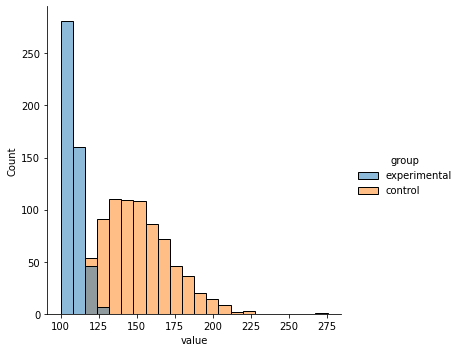

In [9]:
sns.displot(data=df, x='value', hue='group')

In [10]:
df.groupby('group').agg({'value':'median'})

,value
group,
control,148.832127
experimental,106.982597


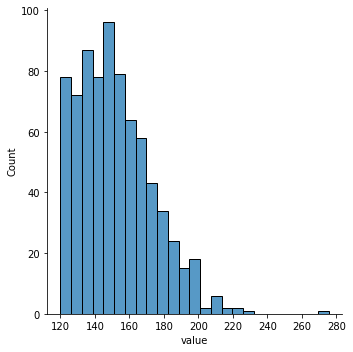

In [11]:
sns.displot(data=df[df.group == 'control'], x='value')

In [12]:
df_control  = df[df.group == 'control']

In [13]:
df_control.value.median()

148.83212650911054

### Выборка с повторениями из существующей выборки

In [14]:
df_test = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8]})

In [16]:
df_test.sample(frac=1, replace=True)

,x
0,1
0,1
5,6
1,2
2,3
6,7
2,3
3,4


In [33]:
medians = []

In [34]:
n = 10000

for i in range(n):
    sample_data = df_control.sample(frac=1, replace=True)
    sample_median = sample_data.value.median()
    medians.append(sample_median)

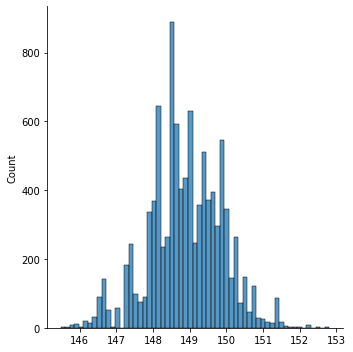

In [35]:
sns.displot(medians)

In [36]:
pd.Series(medians).quantile(0.975)

150.7937987582663

In [37]:
pd.Series(medians).quantile(0.025)

146.6820347417457

In [41]:
bootstrap((df_control.value, ), np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=146.6661656921323, high=150.77637997981842), standard_error=0.9801463730029719)

In [42]:
exp_df = df[df.group == 'experimental']
median_diff = []

for i in range(10000):
    sample_data_control = df_control.sample(frac=1, replace=True)
    sample_median_control = sample_data_control.value.median()
    
    
    sample_data_exp = exp_df.sample(frac=1, replace=True)
    sample_median_exp = sample_data_exp.value.median()
    
    sample_median_diff = sample_median_control - sample_median_exp
    median_diff.append(sample_median_diff)

In [43]:
pd.Series(median_diff).quantile(0.975)

43.98027242498248

In [44]:
pd.Series(median_diff).quantile(0.025)

39.65465147970311